Ref.: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data=pd.read_csv('VideoGamesSales.csv', header=0)
data=data.dropna()
print(data.shape)
print(list(data.columns))

(6825, 16)
['Name', 'Platform', 'Year_of_Release', 'Genre', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count', 'Developer', 'Rating']


In [3]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [4]:
data.isnull().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

In [5]:
data = data.fillna(data.mean())
type(data["Year_of_Release"][0])
data["Year_of_Release"] = data["Year_of_Release"].fillna(0).astype(int)
data["Year_of_Release"]

0        2006
2        2008
3        2009
6        2006
7        2006
         ... 
16667    2001
16677    2002
16696    2014
16700    2011
16706    2011
Name: Year_of_Release, Length: 6825, dtype: int64

In [6]:
data['Rating'].value_counts()

T       2377
E       2082
M       1433
E10+     930
K-A        1
AO         1
RP         1
Name: Rating, dtype: int64

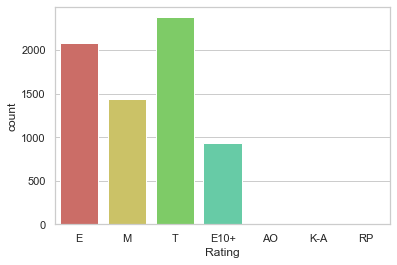

In [7]:
sns.countplot(x='Rating', data=data, palette='hls')
plt.show()

In [8]:
e = len(data[data['Rating']=='E'])
m = len(data[data['Rating']=='M'])
t = len(data[data['Rating']=='T'])
e10 = len(data[data['Rating']=='E10+'])
otros = len(data[data['Rating']=='AO']) + len(data[data['Rating']=='K-A'])+ len(data[data['Rating']=='RP'])
pct_e = e/(e+m+t+e10+otros)
print("percentaje de E es ", pct_e*100)
pct_m = m/(e+m+t+e10+otros)
print("percentaje de M es", pct_m*100)
pct_t = t/(e+m+t+e10+otros)
print("percentaje de T es", pct_t*100)
pct_e10 = e10/(e+m+t+e10+otros)
print("percentaje de E10+ es ", pct_e10*100)
pct_otros = otros/(e+m+t+e10+otros)
print("percentaje de otros es", pct_otros*100)


percentaje de E es  30.505494505494507
percentaje de M es 20.996336996336996
percentaje de T es 34.827838827838825
percentaje de E10+ es  13.626373626373626
percentaje de otros es 0.04395604395604395


In [9]:
data.groupby('Rating').mean()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Rating,,,,,,,,,
AO,2005.000000,1.260000,0.610000,0.000000,0.090000,1.950000,93.000000,58.000000,118.000000
E,2006.334774,0.473593,0.283756,0.091580,0.092118,0.941162,70.679155,22.843420,57.722863
E10+,2009.188172,0.307559,0.167677,0.041731,0.064086,0.581237,68.226882,24.850538,87.263441
K-A,1996.000000,0.260000,0.160000,1.460000,0.030000,1.920000,92.000000,15.000000,48.000000
M,2008.717376,0.505659,0.325939,0.043461,0.119846,0.994962,71.964410,39.205862,499.917655
RP,2011.000000,0.000000,0.030000,0.000000,0.010000,0.030000,63.000000,12.000000,27.000000
T,2006.949095,0.292036,0.166899,0.060858,0.059323,0.579436,69.679849,29.666386,115.511569


In [10]:
data.groupby('Publisher').mean()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Publisher,,,,,,,,,
10TACLE Studios,2006.000000,0.010000,0.010000,0.0000,0.000000,0.020000,42.000000,4.000000,5.000000
1C Company,2010.000000,0.005000,0.020000,0.0000,0.005000,0.030000,79.500000,23.000000,125.500000
2D Boy,2008.000000,0.000000,0.030000,0.0000,0.010000,0.040000,90.000000,26.000000,607.000000
3DO,2001.200000,0.086667,0.062667,0.0000,0.019333,0.165333,55.333333,12.466667,7.533333
505 Games,2009.312500,0.207375,0.135375,0.0115,0.041000,0.396375,63.325000,21.175000,107.750000
...,...,...,...,...,...,...,...,...,...
Zoo Games,2008.666667,0.416667,0.000000,0.0000,0.030000,0.446667,60.333333,8.000000,5.666667
Zushi Games,2009.000000,0.180000,0.010000,0.0000,0.010000,0.210000,68.000000,34.000000,19.000000
bitComposer Games,2010.000000,0.000000,0.025000,0.0000,0.010000,0.030000,69.000000,9.500000,22.000000


In [11]:
data.groupby('Genre').mean()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Genre,,,,,,,,,
Action,2008.401227,0.362718,0.237902,0.046730,0.090466,0.738135,67.828834,30.204908,202.201840
Adventure,2007.633065,0.156492,0.101048,0.035202,0.032460,0.325605,66.133065,24.947581,114.770161
Fighting,2007.121693,0.360820,0.160053,0.073677,0.066508,0.661243,69.732804,28.873016,66.544974
Misc,2007.934896,0.578255,0.313698,0.086510,0.105234,1.084010,67.460938,24.828125,33.447917
Platform,2006.339950,0.480397,0.269380,0.106923,0.080720,0.937469,70.000000,26.784119,114.590571
Puzzle,2006.991525,0.283898,0.203729,0.126949,0.053644,0.668644,70.694915,28.576271,34.457627
Racing,2006.387263,0.388279,0.283408,0.047780,0.100327,0.819656,69.543890,25.882960,73.750430
Role-Playing,2007.790730,0.308329,0.167416,0.172008,0.056685,0.704171,72.820225,33.042135,331.209270
Shooter,2007.630787,0.519398,0.302222,0.021493,0.101736,0.945000,70.981481,37.114583,392.393519


In [12]:
data.groupby('Genre').mean()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Genre,,,,,,,,,
Action,2008.401227,0.362718,0.237902,0.046730,0.090466,0.738135,67.828834,30.204908,202.201840
Adventure,2007.633065,0.156492,0.101048,0.035202,0.032460,0.325605,66.133065,24.947581,114.770161
Fighting,2007.121693,0.360820,0.160053,0.073677,0.066508,0.661243,69.732804,28.873016,66.544974
Misc,2007.934896,0.578255,0.313698,0.086510,0.105234,1.084010,67.460938,24.828125,33.447917
Platform,2006.339950,0.480397,0.269380,0.106923,0.080720,0.937469,70.000000,26.784119,114.590571
Puzzle,2006.991525,0.283898,0.203729,0.126949,0.053644,0.668644,70.694915,28.576271,34.457627
Racing,2006.387263,0.388279,0.283408,0.047780,0.100327,0.819656,69.543890,25.882960,73.750430
Role-Playing,2007.790730,0.308329,0.167416,0.172008,0.056685,0.704171,72.820225,33.042135,331.209270
Shooter,2007.630787,0.519398,0.302222,0.021493,0.101736,0.945000,70.981481,37.114583,392.393519


Text(0, 0.5, 'Year_of_Release')

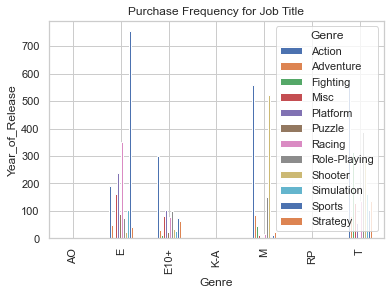

In [13]:
pd.crosstab(data.Rating,data.Genre).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Genre')
plt.ylabel('Year_of_Release')
#plt.savefig('purchase_fre_job')

In [ ]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
plt.savefig('edu_vs_pur_stack')

In [ ]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_dayofweek_bar')

In [ ]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_month_bar')

In [ ]:
data.age.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

In [ ]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Purchase')
plt.savefig('pur_fre_pout_bar')

# Create Dummy variables


In [14]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E


In [15]:
cat_vars=['Name','Platform','Genre','Publisher','Developer','Rating']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['Name','Platform','Genre','Publisher','Developer','Rating']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [16]:
data_final=data[to_keep]
data_final.columns.values

array(['Year_of_Release', 'NA_Sales', 'EU_Sales', ..., 'Rating_M',
       'Rating_RP', 'Rating_T'], dtype=object)

In [17]:
data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,...,0,0,0,0,1,0,0,0,0,0
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,...,0,0,0,0,1,0,0,0,0,0
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,...,0,0,0,0,1,0,0,0,0,0
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,...,0,0,0,0,1,0,0,0,0,0
7,Wii Play,Wii,2006,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,...,0,0,0,0,1,0,0,0,0,0


In [18]:
data_final.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,...,0,0,0,0,1,0,0,0,0,0
2,2008,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,...,0,0,0,0,1,0,0,0,0,0
3,2009,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,...,0,0,0,0,1,0,0,0,0,0
6,2006,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,...,0,0,0,0,1,0,0,0,0,0
7,2006,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,...,0,0,0,0,1,0,0,0,0,0


In [17]:
data_final.shape

(6825, 5974)

In [19]:
data_final.loc[:, 'Rating_E'].value_counts()

0    4743
1    2082
Name: Rating_E, dtype: int64

### SMOTE algorithm

In [20]:
X = data_final.loc[:, data_final.columns != 'Rating_E']
y = data_final.loc[:, data_final.columns == 'Rating_E']


In [21]:
y

,Rating_E
0,1
2,1
3,1
6,1
7,1
...,...
16667,1
16677,0
16696,0
16700,0


In [22]:
X.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2006,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,...,0,0,0,0,0,0,0,0,0,0
2,2008,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,...,0,0,0,0,0,0,0,0,0,0
3,2009,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,...,0,0,0,0,0,0,0,0,0,0
6,2006,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,...,0,0,0,0,0,0,0,0,0,0
7,2006,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,...,0,0,0,0,0,0,0,0,0,0


In [23]:
y.shape

(6825, 1)

In [25]:
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_resample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Rating_E'])


In [26]:
os_data_X.shape

(6666, 5973)

In [27]:
os_data_y

,Rating_E
0,1
1,0
2,1
3,0
4,0
...,...
6661,1
6662,1
6663,1
6664,1


In [28]:
os_data_X.head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,...,Developer_neo Software,Developer_odenis studio,Developer_syn Sophia,Developer_zSlide,Rating_AO,Rating_E10+,Rating_K-A,Rating_M,Rating_RP,Rating_T
0,2009,0.17,0.01,0.00,0.02,0.20,53.0,6.0,5.8,4.0,...,0,0,0,0,0,0,0,0,0,0
1,2005,0.46,0.21,0.00,0.15,0.82,83.0,49.0,8.0,34.0,...,0,0,0,0,0,0,0,0,0,1
2,2005,0.12,0.03,0.00,0.00,0.15,75.0,17.0,9.3,4.0,...,0,0,0,0,0,0,0,0,0,0
3,2007,0.38,0.36,0.00,0.15,0.88,71.0,30.0,7.5,49.0,...,0,0,0,0,0,0,0,0,0,1
4,2005,0.27,0.10,0.22,0.01,0.61,85.0,30.0,7.3,70.0,...,0,0,0,0,0,1,0,0,0,0


In [30]:
os_data_y.Rating_E.value_counts()

0    3333
1    3333
Name: Rating_E, dtype: int64

### Logistic Regression Model Fitting

In [31]:
y_train

,Rating_E
7573,1
2508,0
8727,1
2355,0
3306,0
...,...
9569,0
5648,0
2613,0
4295,1


In [32]:
y_train = np.ravel(y_train.Rating_E)

In [33]:
os_data_y

,Rating_E
0,1
1,0
2,1
3,0
4,0
...,...
6661,1
6662,1
6663,1
6664,1


In [34]:
logreg = LogisticRegression(max_iter=1000)
#logreg.fit(X_train, y_train)
os_data_X.fillna(os_data_X.mean())
os_data_y.fillna(os_data_y.mean())

logreg.fit(os_data_X, os_data_y)


/Users/joseestenssoro/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/joseestenssoro/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [35]:
logreg.coef_

array([[ 2.66180601e-03,  2.35004564e-01,  2.62018787e-01, ...,
        -7.76842670e+00,  0.00000000e+00, -8.92183415e+00]])

### STRATIFIED CROSS VALIDATION

In [36]:
from sklearn.model_selection import StratifiedKFold 
from sklearn.metrics import accuracy_score
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) 
scaler = preprocessing.MinMaxScaler() 
x_scaled = scaler.fit_transform(os_data_X) 
y = np.array(os_data_y)
y = np.ravel(y)

In [37]:
lst_accu_stratified = [] 
fold_no = 1
for train_index, test_index in skf.split(x_scaled, y): 
    x_train_fold, x_test_fold = x_scaled[train_index], x_scaled[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    logreg.fit(x_train_fold, y_train_fold)
    predictions = logreg.predict(x_test_fold)
    print('Fold',str(fold_no),'Accuracy:',accuracy_score(y_test_fold,predictions))
    print(classification_report(y_test_fold,predictions))
    fold_no += 1


Fold 1 Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       334

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667

Fold 2 Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       334

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       667
weighted avg       1.00      1.00      1.00       667

Fold 3 Accuracy: 0.9985007496251874
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       333
           1       1.00      1.00      1.00       334

    accuracy                           1.00       667
   macro avg       1.00      1.00      1.00       

### Confusion Matrix

In [38]:
predictions

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test_fold,predictions)
print(confusion_matrix)

[[333   0]
 [  0 333]]


### ROC curve

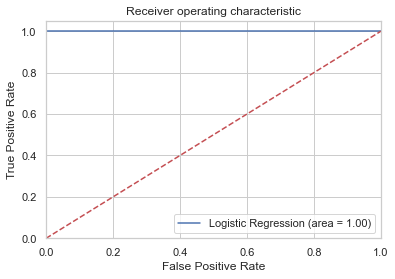

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_fold,predictions)
fpr, tpr, thresholds = roc_curve(y_test_fold,predictions)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()